<a href="https://colab.research.google.com/github/tushar69basak/Deep-Learning-Project/blob/main/DogvsCat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:29<00:00, 30.4MB/s]
100% 812M/812M [00:29<00:00, 28.9MB/s]


In [12]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [13]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [14]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [15]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [16]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.1956.jpg', 'dog.11305.jpg', 'cat.7215.jpg', 'cat.6495.jpg', 'cat.1668.jpg', 'dog.10040.jpg', 'cat.2023.jpg', 'dog.10144.jpg', 'dog.3916.jpg', 'cat.10760.jpg', 'cat.10868.jpg', 'dog.5933.jpg', 'cat.2223.jpg', 'cat.8568.jpg', 'cat.7844.jpg', 'cat.6587.jpg', 'cat.2725.jpg', 'dog.2414.jpg', 'dog.3237.jpg', 'cat.10896.jpg', 'cat.1214.jpg', 'dog.11084.jpg', 'dog.4566.jpg', 'cat.5974.jpg', 'cat.2305.jpg', 'dog.6452.jpg', 'dog.9895.jpg', 'cat.1187.jpg', 'dog.2975.jpg', 'cat.1907.jpg', 'cat.7279.jpg', 'cat.8246.jpg', 'cat.4495.jpg', 'dog.2343.jpg', 'cat.638.jpg', 'cat.6514.jpg', 'dog.12135.jpg', 'dog.8957.jpg', 'dog.3512.jpg', 'cat.3576.jpg', 'dog.8997.jpg', 'dog.4333.jpg', 'dog.4332.jpg', 'dog.2882.jpg', 'cat.5855.jpg', 'cat.9704.jpg', 'cat.5651.jpg', 'dog.6943.jpg', 'cat.12236.jpg', 'dog.301.jpg', 'dog.6612.jpg', 'cat.2945.jpg', 'cat.2148.jpg', 'cat.2938.jpg', 'cat.168.jpg', 'dog.1481.jpg', 'cat.2537.jpg', 'dog.3095.jpg', 'cat.11897.jpg', 'cat.3740.jpg', 'cat.2083.jpg', 'cat.7792.jpg', 

In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

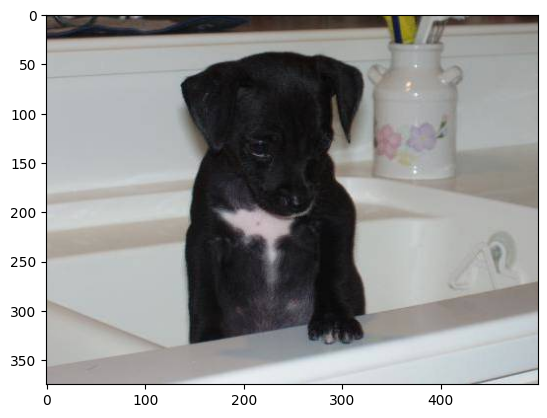

In [18]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

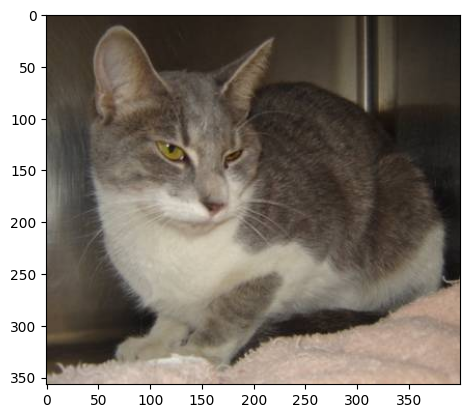

In [19]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [20]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

cat
dog
cat
cat
cat


In [21]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [22]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [24]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

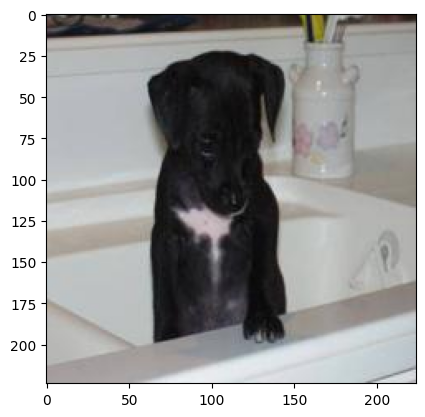

In [25]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

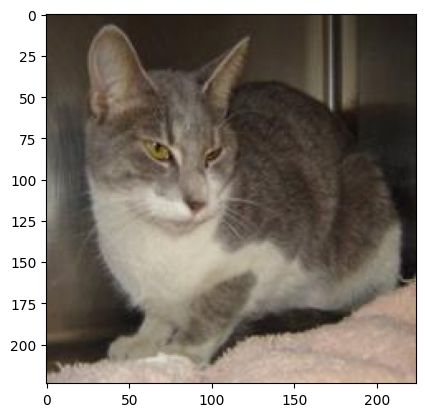

In [26]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [27]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [28]:
print(filenames[0:5])
print(len(filenames))

['cat.1956.jpg', 'dog.11305.jpg', 'cat.7215.jpg', 'cat.6495.jpg', 'cat.1668.jpg']
2000


In [29]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 0, 0]
2000


In [30]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 999 1001]


In [31]:
import cv2
import glob

In [32]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [33]:
print(dog_cat_images)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[208 197 193]
   [206 195 191]
   [205 193 191]
   ...
   [ 95 165 182]
   [ 90 160 177]
   [ 94 166 183]]

  [[213 202 198]
   [212 201 197]
   [210 198 196]
   ...
   [ 99 170 184]
   [ 99 169 186]
   [107 180 194]]

  [[215 204 200]
   [213 202 198]
   [211 199 197]
   ...
   [104 176 188]
   [105 176 190]
   [114 188

In [34]:
type(dog_cat_images)

numpy.ndarray

In [35]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [36]:
X = dog_cat_images
Y = np.asarray(labels)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [39]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [40]:
print(X_train_scaled)

[[[[0.32941176 0.34509804 0.41960784]
   [0.32941176 0.34509804 0.41960784]
   [0.33333333 0.34901961 0.42352941]
   ...
   [0.29411765 0.32156863 0.42745098]
   [0.30588235 0.33333333 0.43921569]
   [0.31372549 0.34117647 0.44705882]]

  [[0.3372549  0.35294118 0.42745098]
   [0.3372549  0.35294118 0.42745098]
   [0.3372549  0.35294118 0.42745098]
   ...
   [0.29411765 0.32156863 0.42745098]
   [0.30588235 0.33333333 0.43921569]
   [0.31372549 0.34117647 0.44705882]]

  [[0.34117647 0.35686275 0.43137255]
   [0.34509804 0.36078431 0.43529412]
   [0.34509804 0.36078431 0.43529412]
   ...
   [0.29411765 0.32156863 0.42745098]
   [0.30588235 0.33333333 0.43921569]
   [0.31372549 0.34117647 0.44705882]]

  ...

  [[0.21176471 0.23137255 0.22745098]
   [0.21176471 0.23137255 0.22745098]
   [0.20784314 0.22745098 0.22352941]
   ...
   [0.70196078 0.72941176 0.80784314]
   [0.70196078 0.7254902  0.81568627]
   [0.70588235 0.72941176 0.81960784]]

  [[0.21176471 0.23137255 0.22745098]
   [0.2

In [41]:
import tensorflow as tf
import tensorflow_hub as hub

In [42]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [43]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [44]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [45]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 82s 1s/step - loss: 0.1836 - acc: 0.9256
Epoch 2/5
50/50 [==============================] - 71s 1s/step - loss: 0.0650 - acc: 0.9794
Epoch 3/5
50/50 [==============================] - 66s 1s/step - loss: 0.0506 - acc: 0.9819
Epoch 4/5
50/50 [==============================] - 66s 1s/step - loss: 0.0386 - acc: 0.9862
Epoch 5/5
50/50 [==============================] - 73s 1s/step - loss: 0.0326 - acc: 0.9925


In [46]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 19s 1s/step - loss: 0.0580 - acc: 0.9775
Test Loss = 0.05799239128828049
Test Accuracy = 0.9775000214576721


Path of the image to be predicted: /content/dog1.jpg


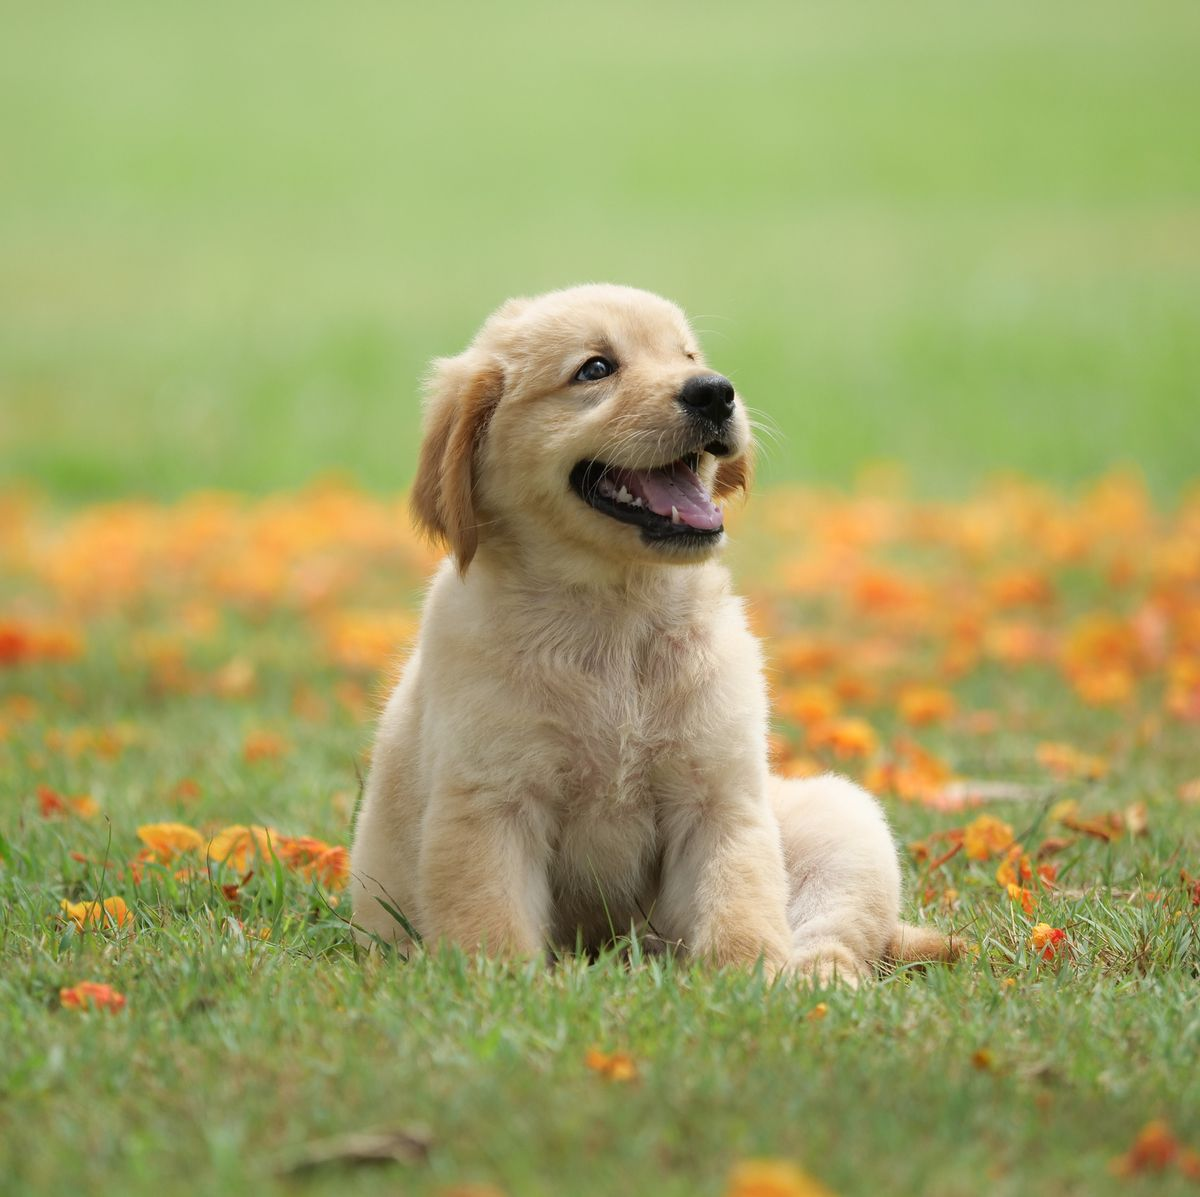

1/1 [==============================] - 2s 2s/step
[[-2.498896   4.6013527]]
1
The image represents a Dog


In [47]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat1.jpg


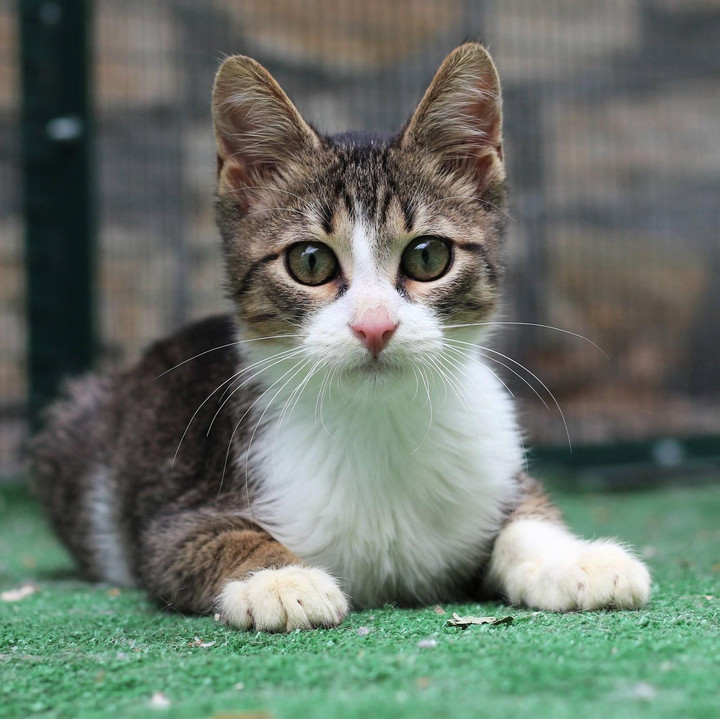

1/1 [==============================] - 0s 87ms/step
[[ 5.2317104 -3.5785894]]
0
The image represents a Cat


In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')